## Figure 5

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(arrow))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”


In [2]:
figure_dir <- "../figures"
output_main_figure_5 <- file.path(
    figure_dir, "main_figure_5_top_feature_montages.png"
)

## Load in top two features image montages (Radial Distribution for Null and Correlation for WT)

### Top WT feature max montage

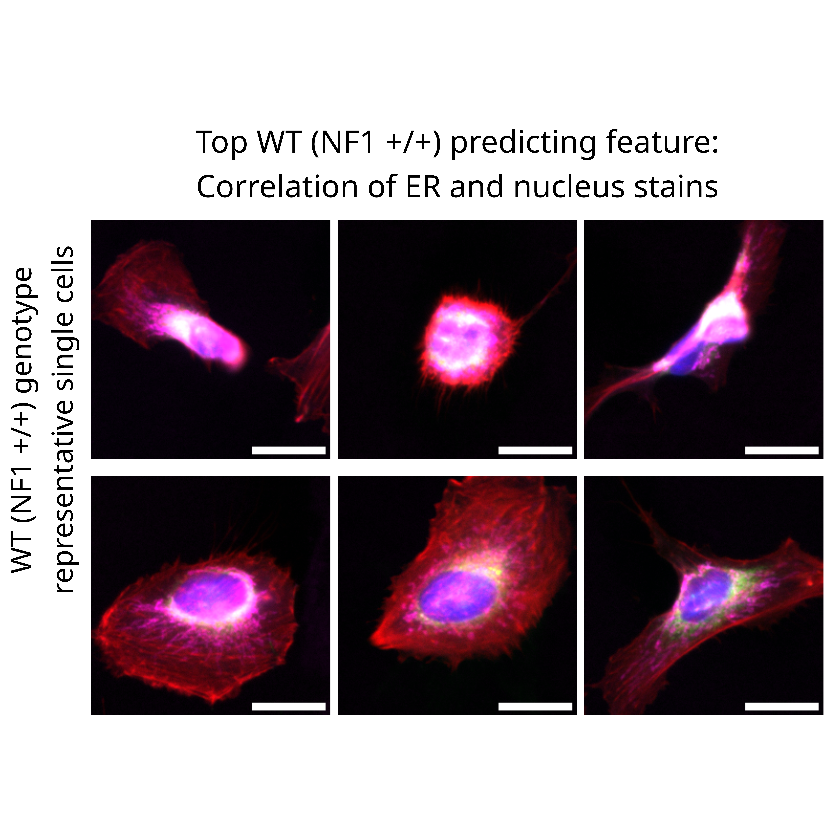

In [3]:
corr_feat_path_max = file.path("./correlation_feature_montage_max.png")
corr_feat_img_max = png::readPNG(corr_feat_path_max)

# Get the dimensions of the image
img_height <- nrow(corr_feat_img_max)
img_width <- ncol(corr_feat_img_max)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
corr_montage_WT_max <- ggplot() +
  annotation_custom(
    rasterGrob(corr_feat_img_max, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

corr_montage_WT_max

### Top WT feature min montage

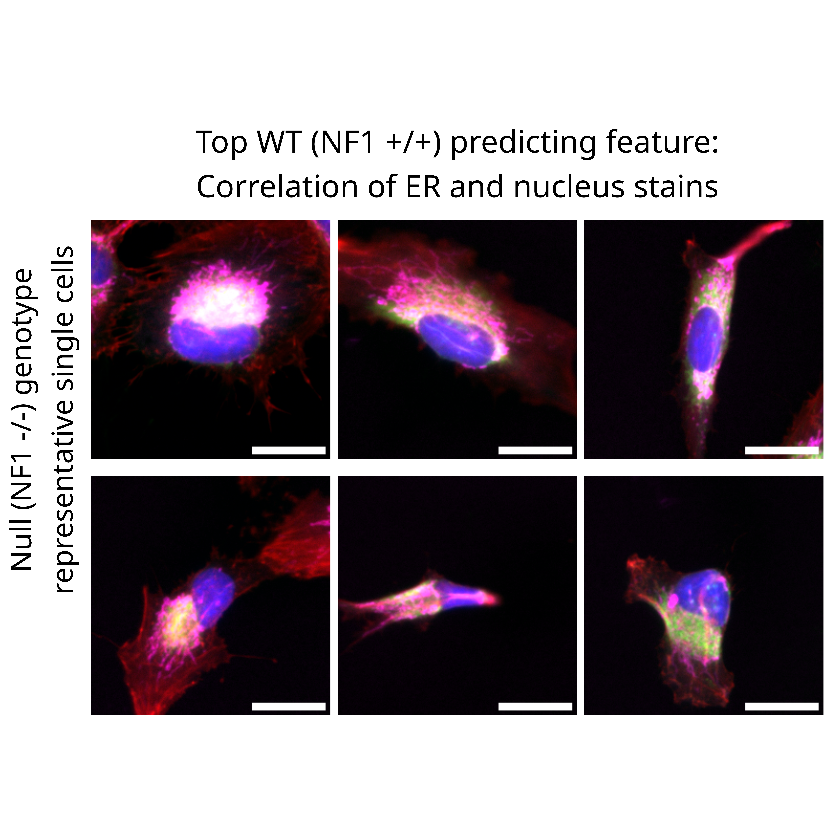

In [4]:
corr_feat_path_min = file.path("./correlation_feature_montage_min.png")
corr_feat_img_min = png::readPNG(corr_feat_path_min)

# Get the dimensions of the image
img_height <- nrow(corr_feat_img_min)
img_width <- ncol(corr_feat_img_min)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
corr_montage_Null_min <- ggplot() +
  annotation_custom(
    rasterGrob(corr_feat_img_min, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

corr_montage_Null_min

### Top Null feature max montage

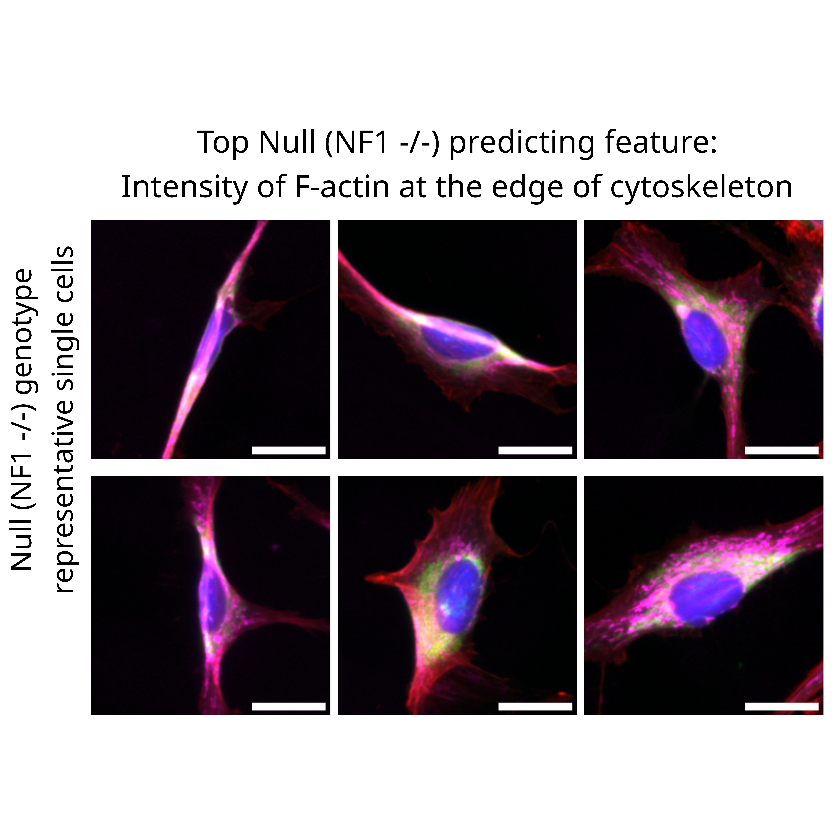

In [5]:
radial_feat_path_max = file.path("./radial_feature_montage_max.png")
radial_feat_img_max = png::readPNG(radial_feat_path_max)

# Get the dimensions of the image
img_height <- nrow(radial_feat_img_max)
img_width <- ncol(radial_feat_img_max)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
radial_montage_Null_max <- ggplot() +
  annotation_custom(
    rasterGrob(radial_feat_img_max, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

radial_montage_Null_max

### Top Null feature min montage

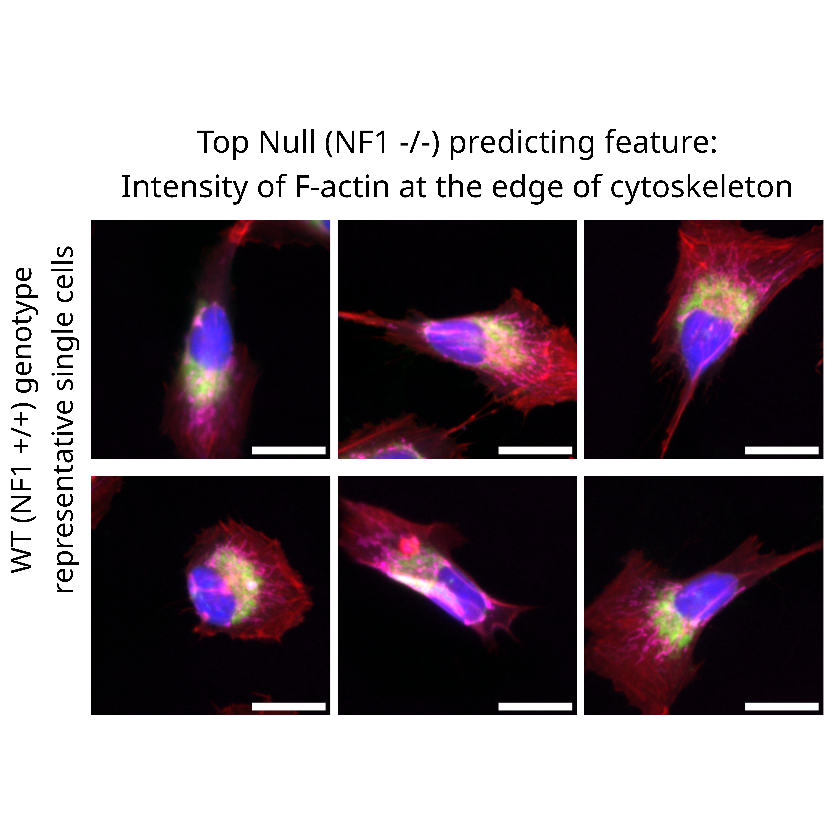

In [6]:
radial_feat_path_min = file.path("./radial_feature_montage_min.png")
radial_feat_img_min = png::readPNG(radial_feat_path_min)

# Get the dimensions of the image
img_height <- nrow(radial_feat_img_min)
img_width <- ncol(radial_feat_img_min)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the image montage to a ggplot object
radial_montage_WT_min <- ggplot() +
  annotation_custom(
    rasterGrob(radial_feat_img_min, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

radial_montage_WT_min

## Generate main figure 5

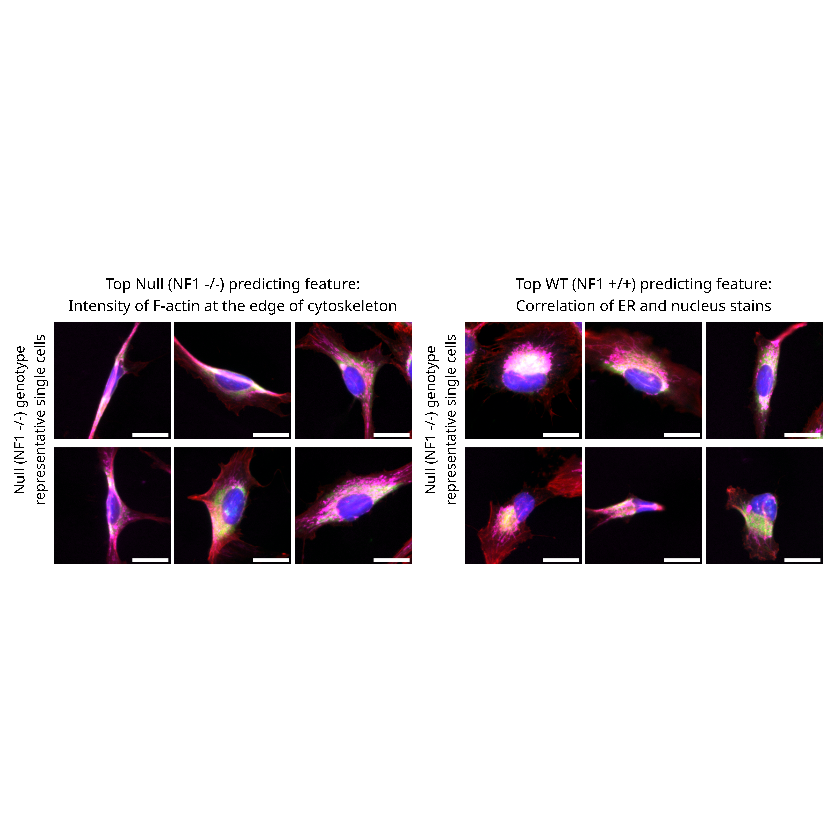

In [7]:
top_montage <- (
   free(radial_montage_Null_max) | 
   corr_montage_Null_min
) + plot_layout(widths = c(1,1))

top_montage

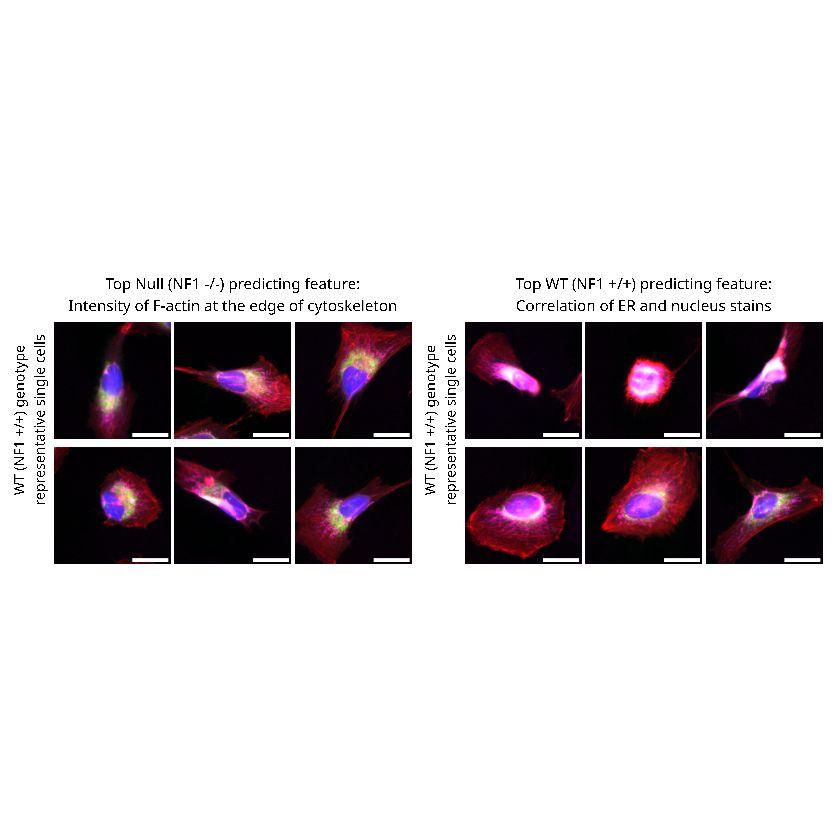

In [8]:
bottom_montage <- (
   free(radial_montage_WT_min) | 
   corr_montage_WT_max
) + plot_layout(widths = c(1,1))

bottom_montage

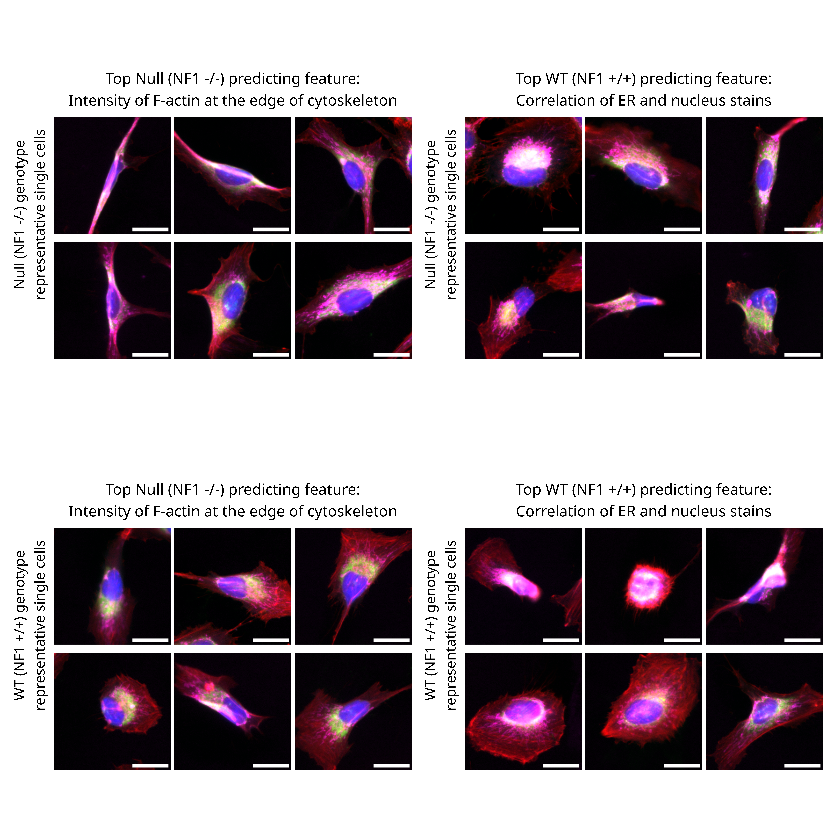

In [9]:
align_plot <- (
    top_montage /
    bottom_montage
) + plot_layout(heights = c(1,1))

align_plot

In [10]:
fig_5_gg <- (
  align_plot
) + plot_annotation(tag_levels = list(c("A", "B", "", ""))) & theme(plot.tag = element_text(size = 28))

# Save or display the plot
ggsave(output_main_figure_5, plot = fig_5_gg, dpi = 500, height = 14, width = 18)